Numenta_Anomaly_Benchmark_(NAB)

In [2]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
!pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


Index(['Time', 'Value', 'exported_instance', 'exported_job', 'http_method',
       'http_route', 'http_status_code', 'instance', 'job', 'service_name',
       'span_kind', 'span_name', 'status_code'],
      dtype='object')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

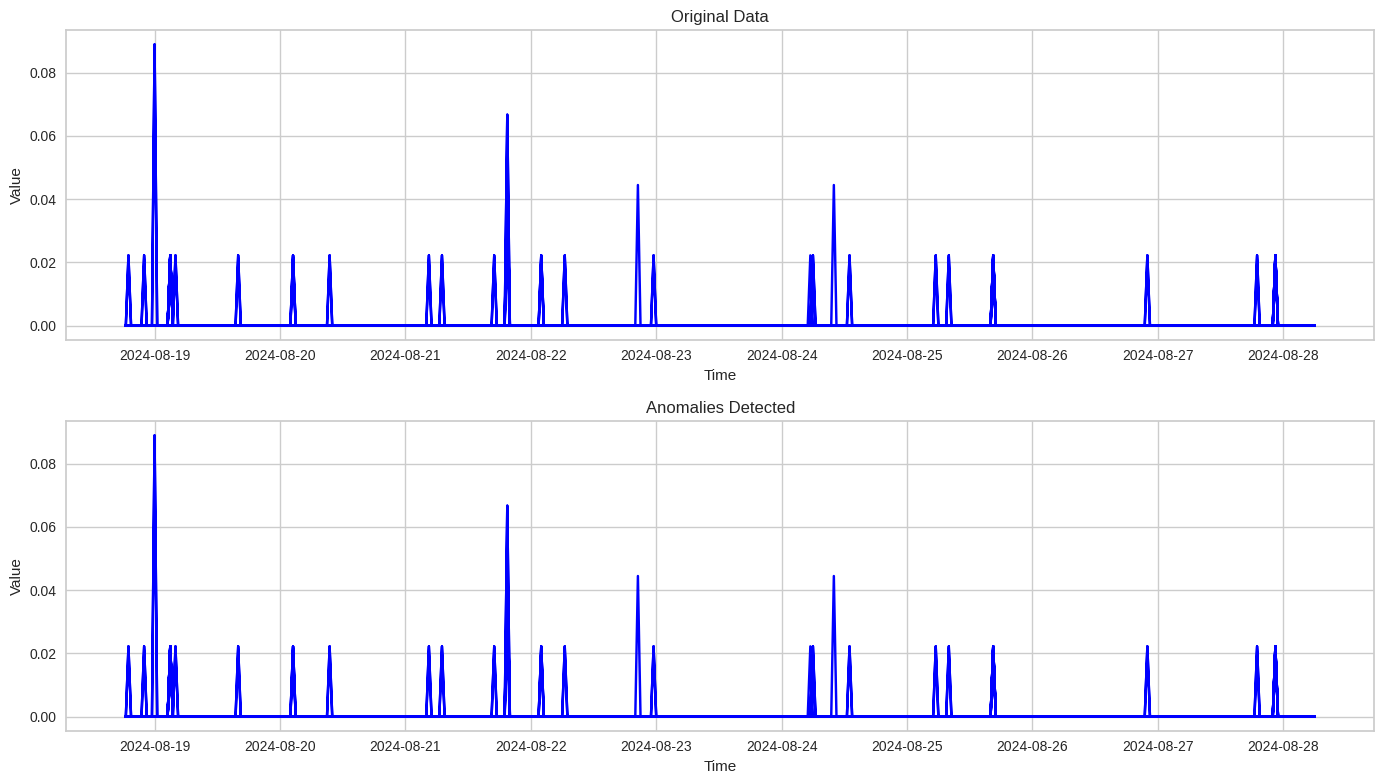

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.anomaly import *

# Load the data
file_path = '/content/calls_total_df.csv'
df = pd.read_csv(file_path)

# Check the column names
print(df.columns)

# Assuming the timestamp column is named 'Time'
df['Time'] = pd.to_datetime(df['Time'])

# Initialize PyCaret for anomaly detection
# The 'silent' parameter has been replaced by 'verbose' in newer versions of PyCaret.
exp = setup(df, normalize=True, verbose=False)

# Create the model
model = create_model('iforest')
knn_model = create_model('knn')

# Predict anomalies
#df['anomaly'] = predict_model(model, data=df)['Anomaly']
df['anomaly'] = predict_model(knn_model, data=df)['Anomaly']

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot the original values
plt.subplot(2, 1, 1)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the anomalies
anomalies = df[df['anomaly'] == -1]
plt.subplot(2, 1, 2)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.scatter(anomalies['Time'], anomalies['Value'], color='red', label='Anomaly')
plt.title('Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

Index(['Time', 'Value', 'exported_instance', 'exported_job', 'http_method',
       'http_route', 'http_status_code', 'instance', 'job', 'service_name',
       'span_kind', 'span_name', 'status_code'],
      dtype='object')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

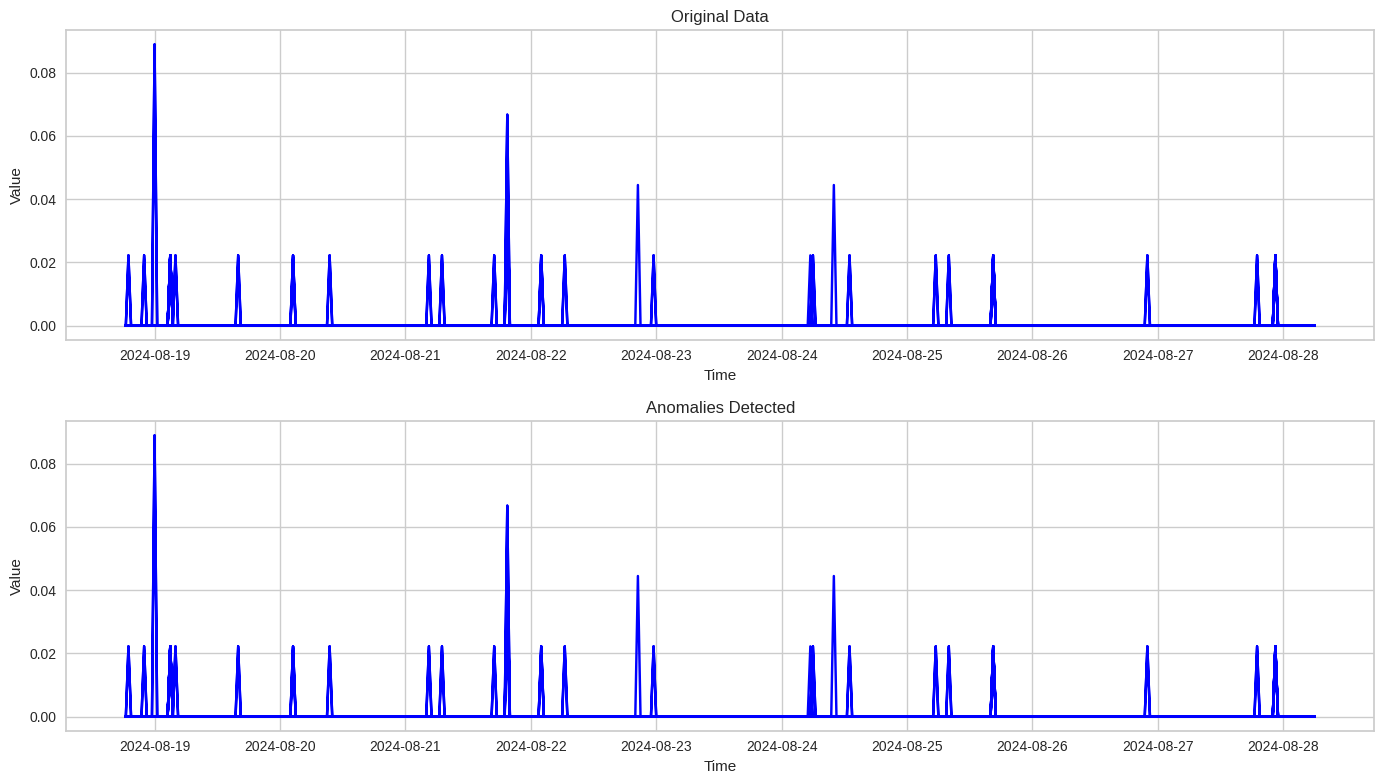

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.anomaly import *

# Load the data
file_path = '/content/duration_ms_count_df.csv'
df = pd.read_csv(file_path)

# Check the column names
print(df.columns)

# Assuming the timestamp column is named 'Time'
df['Time'] = pd.to_datetime(df['Time'])

# Initialize PyCaret for anomaly detection
# The 'silent' parameter has been replaced by 'verbose' in newer versions of PyCaret.
exp = setup(df, normalize=True, verbose=False)

# Create the model
model = create_model('iforest')

# Predict anomalies
df['anomaly'] = predict_model(model, data=df)['Anomaly']

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot the original values
plt.subplot(2, 1, 1)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the anomalies
anomalies = df[df['anomaly'] == -1]
plt.subplot(2, 1, 2)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.scatter(anomalies['Time'], anomalies['Value'], color='red', label='Anomaly')
plt.title('Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

Index(['Time', 'Value', 'exported_instance', 'exported_job', 'http_method',
       'http_route', 'http_status_code', 'instance', 'job', 'service_name',
       'span_kind', 'span_name', 'status_code'],
      dtype='object')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

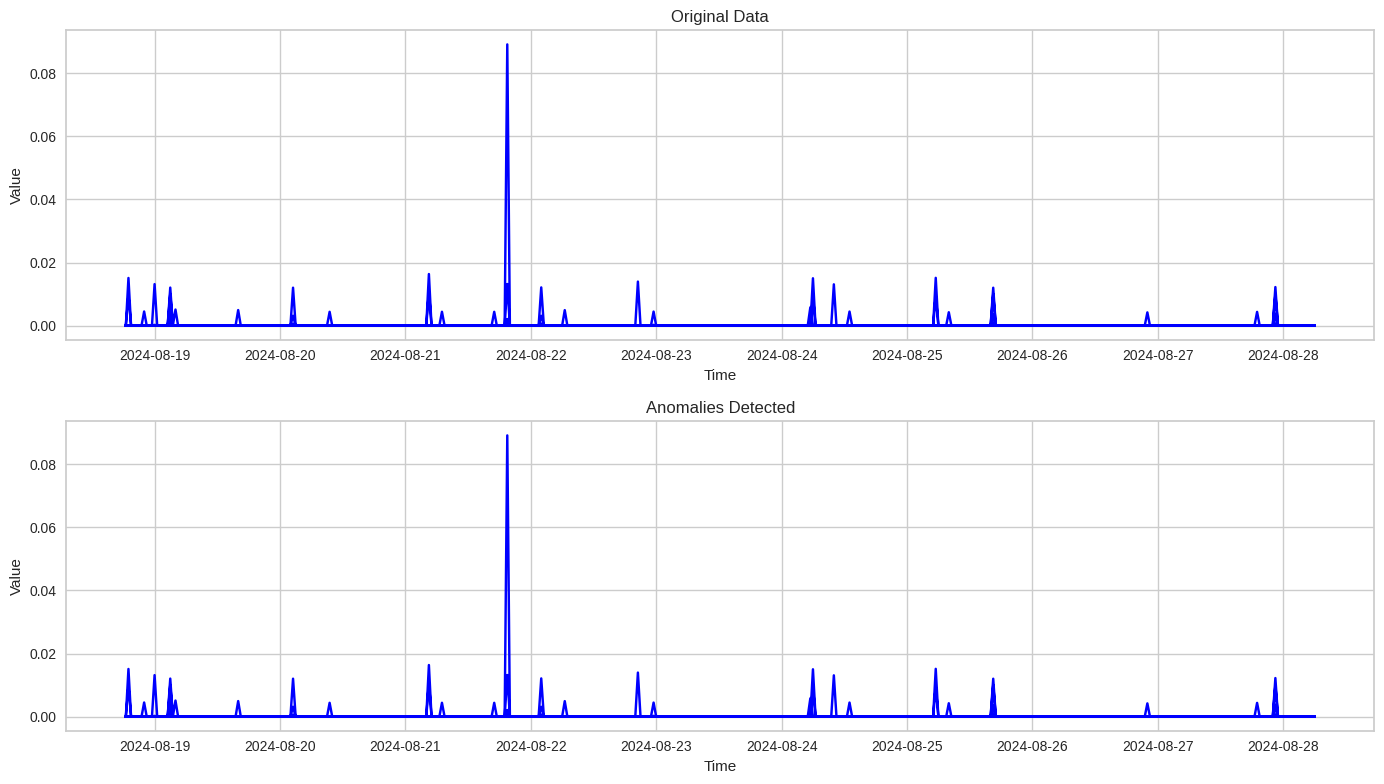

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.anomaly import *

# Load the data
file_path = '/content/duration_ms_sum_df.csv'
df = pd.read_csv(file_path)

# Check the column names
print(df.columns)

# Assuming the timestamp column is named 'Time'
df['Time'] = pd.to_datetime(df['Time'])

# Initialize PyCaret for anomaly detection
# The 'silent' parameter has been replaced by 'verbose' in newer versions of PyCaret.
exp = setup(df, normalize=True, verbose=False)

# Create the model
model = create_model('iforest')
knn_model = create_model('knn')

# Predict anomalies
#df['anomaly'] = predict_model(model, data=df)['Anomaly']
df['anomaly'] = predict_model(knn_model, data=df)['Anomaly']

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot the original values
plt.subplot(2, 1, 1)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the anomalies
anomalies = df[df['anomaly'] == -1]
plt.subplot(2, 1, 2)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.scatter(anomalies['Time'], anomalies['Value'], color='red', label='Anomaly')
plt.title('Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

Index(['Time', 'Value', 'instance', 'job'], dtype='object')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

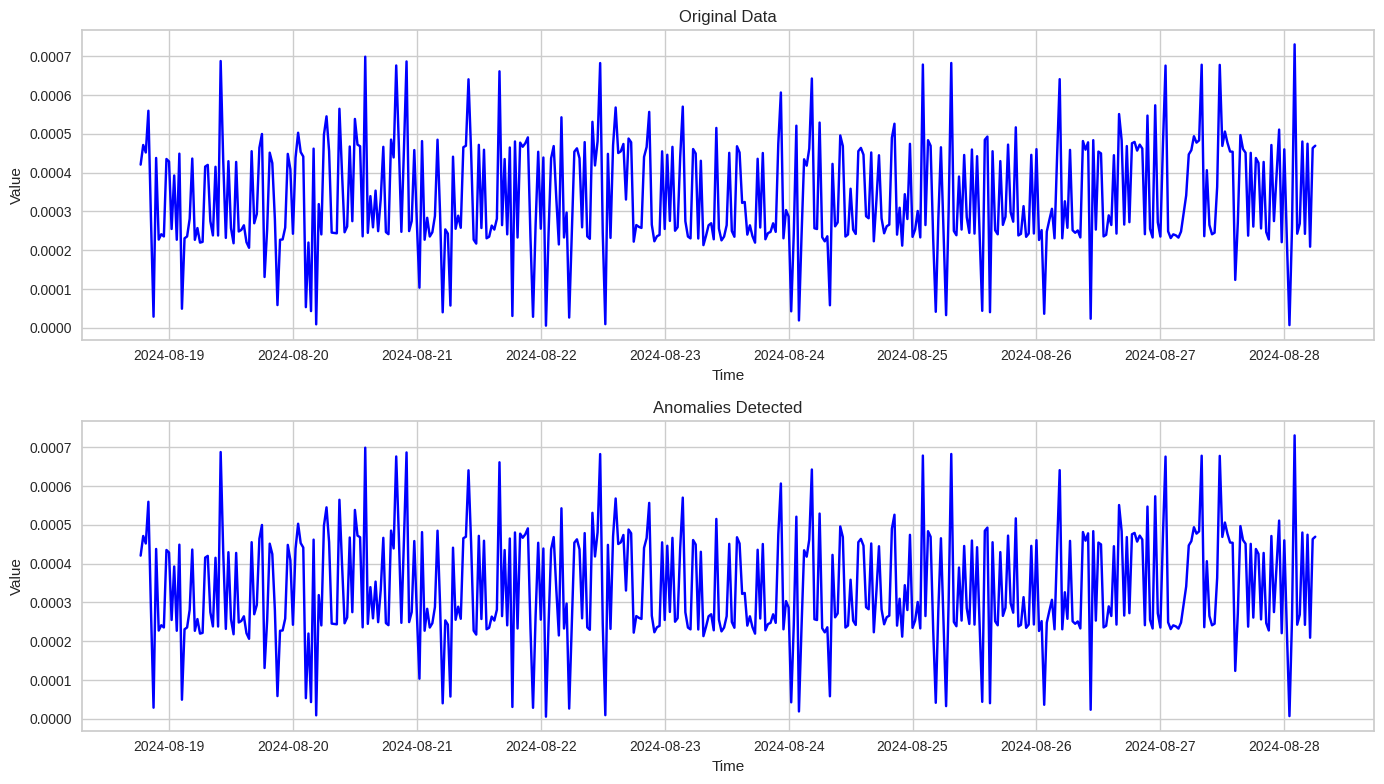

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.anomaly import *

# Load the data
file_path = '/content/scrape_duration_seconds_df.csv'
df = pd.read_csv(file_path)

# Check the column names
print(df.columns)

# Assuming the timestamp column is named 'Time'
df['Time'] = pd.to_datetime(df['Time'])

# Initialize PyCaret for anomaly detection
# The 'silent' parameter has been replaced by 'verbose' in newer versions of PyCaret.
exp = setup(df, normalize=True, verbose=False)

# Create the model
model = create_model('iforest')
knn_model = create_model('knn')

# Predict anomalies
#df['anomaly'] = predict_model(model, data=df)['Anomaly']
df['anomaly'] = predict_model(knn_model, data=df)['Anomaly']

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot the original values
plt.subplot(2, 1, 1)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the anomalies
anomalies = df[df['anomaly'] == -1]
plt.subplot(2, 1, 2)
# Changed 'value' to 'Value' to match the column name in the DataFrame.
plt.plot(df['Time'], df['Value'], label='Value', color='blue')
plt.scatter(anomalies['Time'], anomalies['Value'], color='red', label='Anomaly')
plt.title('Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()